## Web Scrapping Section
We need to find data on MVP player in each season. as well as stats on each player for each NBA season. for sake of scrapping, I'm gonna use the data from "basketball-reference.com". 

### Scrapping MVP pages

In [1]:
import numpy as np
import requests
import numpy as np
import pandas as pd

from bs4 import BeautifulSoup

C:\Users\Arsene\anaconda3\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [2]:
years = list(range(1991,2022))

In [3]:
url_base = "https://www.basketball-reference.com/awards/awards_{}.html"

In [12]:
#scrapping awards page for different years to find MVP
for year in years:
    url = url_base.format(year)
    data = requests.get(url)
    
    with open('mvp/{}.html'.format(year),'w+',encoding='utf-8') as f:
        f.write(data.text)

### extracting the MVP table with beautiful soup

In [19]:
dfs = []
for year in years:
    with open('mvp/{}.html'.format(year),encoding='utf-8') as f:
        page = f.read()
        
    soup = BeautifulSoup(page, 'html.parser')
    soup.find('tr', class_='over_header').decompose()
    mvp_table = soup.find(id='mvp')
    mvp_df = pd.read_html(str(mvp_table))[0]
    mvp_df['year'] = year
    dfs.append(mvp_df)

In [23]:
mvps = pd.concat(dfs)

In [24]:
#all mvp votings 
mvps

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,year
0,1,Michael Jordan,27,CHI,77.0,891.0,960,0.928,82,37.0,...,6.0,5.5,2.7,1.0,0.539,0.312,0.851,20.3,0.321,1991
1,2,Magic Johnson,31,LAL,10.0,497.0,960,0.518,79,37.1,...,7.0,12.5,1.3,0.2,0.477,0.320,0.906,15.4,0.251,1991
2,3,David Robinson,25,SAS,6.0,476.0,960,0.496,82,37.7,...,13.0,2.5,1.5,3.9,0.552,0.143,0.762,17.0,0.264,1991
3,4,Charles Barkley,27,PHI,2.0,222.0,960,0.231,67,37.3,...,10.1,4.2,1.6,0.5,0.570,0.284,0.722,13.4,0.258,1991
4,5,Karl Malone,27,UTA,0.0,142.0,960,0.148,82,40.3,...,11.8,3.3,1.1,1.0,0.527,0.286,0.770,15.5,0.225,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,11,Russell Westbrook,32,WAS,0.0,5.0,1010,0.005,65,36.4,...,11.5,11.7,1.4,0.4,0.439,0.315,0.656,3.7,0.075,2021
11,12,Ben Simmons,24,PHI,0.0,3.0,1010,0.003,58,32.4,...,7.2,6.9,1.6,0.6,0.557,0.300,0.613,6.0,0.153,2021
12,13T,James Harden,31,TOT,0.0,1.0,1010,0.001,44,36.6,...,7.9,10.8,1.2,0.8,0.466,0.362,0.861,7.0,0.208,2021
13,13T,LeBron James,36,LAL,0.0,1.0,1010,0.001,45,33.4,...,7.7,7.8,1.1,0.6,0.513,0.365,0.698,5.6,0.179,2021


In [25]:
#save th edataframe into file
mvps.to_csv('mvps.csv')

### Scrapping stats on each player
In case the whole page is not scrapped due to javascript client issues, i use selenium to scrape the page. As weel, it is needed to install a driver for the browser with regard to the operating system.

In [26]:
player_stat_url = "https://www.basketball-reference.com/leagues/NBA_{}_per_game.html"

In [27]:
#in case we need Javascript to load page client side
for year in years:
    url = player_stat_url.format(year)
    data = requests.get(url)
    with open('player-stats/{}.html'.format(year),'w+',encoding='utf-8') as f:
        f.write(data.text)

In [29]:
from selenium import webdriver

In [79]:
#initialising the driver and using it to render the page
# driver = webdriver.chrome( executable_path = '/Users/Arsene/Downloads/chromedriver_win32')
# driver.get(url)
# driver.execute_script('window.scrollTo(1,10000)')

# #import time to wake the browser
# import time
# time.sleep(2)
# html = driver.page_source
# with open('player-stats/{}.html'.format(year),'w+', encoding='utf-8') as f:
#     f.write(html)

### Extracting player stats with Beautiful soup

In [91]:
plsdf=[]
for year in years:
    with open('player-stats/{}.html'.format(year), encoding='utf-8') as f:
        page = f.read()
        
    soup = BeautifulSoup(page, 'html.parser')
    soup.find('tr', class_='thead').decompose()
    player_table = soup.find(id='per_game_stats')
    player_df = pd.read_html(str(player_table))[0]
    player_df['year'] = year
    plsdf.append(player_df)

In [95]:
player_stats = pd.concat(plsdf)

In [97]:
player_stats.to_csv('player-stats.csv')

In [99]:
player_stats.head(4)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,year
0,1,Alaa Abdelnaby,PF,22,POR,43,0,6.7,1.3,2.7,...,0.6,1.4,2.1,0.3,0.1,0.3,0.5,0.9,3.1,1991
1,2,Mahmoud Abdul-Rauf,PG,21,DEN,67,19,22.5,6.2,15.1,...,0.5,1.3,1.8,3.1,0.8,0.1,1.6,2.2,14.1,1991
2,3,Mark Acres,C,28,ORL,68,0,19.3,1.6,3.1,...,2.1,3.2,5.3,0.4,0.4,0.4,0.6,3.2,4.2,1991
3,4,Michael Adams,PG,28,DEN,66,66,35.5,8.5,21.5,...,0.9,3.0,3.9,10.5,2.2,0.1,3.6,2.5,26.5,1991


### Scrape info on team standings

In [102]:
url_team= "https://www.basketball-reference.com/leagues/NBA_{}_standings.html"

In [103]:
for year in years:
    url = url_team.format(year)
    data = requests.get(url)
    
    with open('teams/{}.html'.format(year),'w+',encoding='utf-8') as f:
        f.write(data.text)

### Extracting the table team using beautiful soup

In [114]:
teamdf=[]
for year in years:
    with open('teams/{}.html'.format(year), encoding='utf-8') as f:
        page = f.read()
        
    soup = BeautifulSoup(page, 'html.parser')
    soup.find('tr', class_='thead').decompose()
    team_table = soup.find(id='divs_standings_E')
    team_df = pd.read_html(str(team_table))[0]
    team_df['year'] = year
    team_df['name'] = team_df['Eastern Conference']
    del team_df['Eastern Conference']
    teamdf.append(team_df)
    
    soup = BeautifulSoup(page, 'html.parser')
    soup.find('tr', class_='thead').decompose()
    team_table = soup.find(id='divs_standings_W')
    team_df = pd.read_html(str(team_table))[0]
    team_df['year'] = year
    team_df['name'] = team_df['Western Conference']
    del team_df['Western Conference']
    teamdf.append(team_df)

In [115]:
teams = pd.concat(teamdf)

In [117]:
teams.to_csv('teams.csv')

In [112]:
team_df

,Eastern Conference,W,L,W/L%,GB,PS/G,PA/G,SRS
0,Boston Celtics*,51,31,.622,—,106.6,103.0,3.41
1,New York Knicks*,51,31,.622,—,101.6,97.7,3.67
2,New Jersey Nets*,40,42,.488,11.0,105.4,107.1,-1.54
3,Miami Heat*,38,44,.463,13.0,105.0,109.2,-3.94
4,Philadelphia 76ers,35,47,.427,16.0,101.9,103.2,-1.34
5,Washington Bullets,25,57,.305,26.0,102.4,106.8,-4.35
6,Orlando Magic,21,61,.256,30.0,101.6,108.5,-6.52
7,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division
8,Chicago Bulls*,67,15,.817,—,109.9,99.5,10.07
9,Cleveland Cavaliers*,57,25,.695,10.0,108.9,103.4,5.34


## Data Cleaning

### Data cleaning on MVPs

In [2]:
mvps = pd.read_csv('mvps.csv')

In [3]:
mvps.head(4)

,Unnamed: 0,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,year
0,0,1,Michael Jordan,27,CHI,77.0,891.0,960,0.928,82,...,6.0,5.5,2.7,1.0,0.539,0.312,0.851,20.3,0.321,1991
1,1,2,Magic Johnson,31,LAL,10.0,497.0,960,0.518,79,...,7.0,12.5,1.3,0.2,0.477,0.320,0.906,15.4,0.251,1991
2,2,3,David Robinson,25,SAS,6.0,476.0,960,0.496,82,...,13.0,2.5,1.5,3.9,0.552,0.143,0.762,17.0,0.264,1991
3,3,4,Charles Barkley,27,PHI,2.0,222.0,960,0.231,67,...,10.1,4.2,1.6,0.5,0.570,0.284,0.722,13.4,0.258,1991


In [4]:
#select subset of columns for furthur processing
cols = ['Player','Pts Won','year','Pts Max','Share']

In [8]:
mvps = mvps[cols]
mvps.head(4)

,Player,Pts Won,year,Pts Max,Share
0,Michael Jordan,891.0,1991,960,0.928
1,Magic Johnson,497.0,1991,960,0.518
2,David Robinson,476.0,1991,960,0.496
3,Charles Barkley,222.0,1991,960,0.231


### Data cleaning on player stats

In [9]:
players = pd.read_csv('player-stats.csv')

In [11]:
players.head(4)

,Unnamed: 0,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,year
0,0,1,Alaa Abdelnaby,PF,22,POR,43,0,6.7,1.3,...,0.6,1.4,2.1,0.3,0.1,0.3,0.5,0.9,3.1,1991
1,1,2,Mahmoud Abdul-Rauf,PG,21,DEN,67,19,22.5,6.2,...,0.5,1.3,1.8,3.1,0.8,0.1,1.6,2.2,14.1,1991
2,2,3,Mark Acres,C,28,ORL,68,0,19.3,1.6,...,2.1,3.2,5.3,0.4,0.4,0.4,0.6,3.2,4.2,1991
3,3,4,Michael Adams,PG,28,DEN,66,66,35.5,8.5,...,0.9,3.0,3.9,10.5,2.2,0.1,3.6,2.5,26.5,1991


In [18]:
#delete unnecessary columns
players=players.drop('Rk', axis =1)
del players['Unnamed: 0']

In [17]:
players.head(4)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,year
0,Alaa Abdelnaby,PF,22,POR,43,0,6.7,1.3,2.7,.474,...,0.6,1.4,2.1,0.3,0.1,0.3,0.5,0.9,3.1,1991
1,Mahmoud Abdul-Rauf,PG,21,DEN,67,19,22.5,6.2,15.1,.413,...,0.5,1.3,1.8,3.1,0.8,0.1,1.6,2.2,14.1,1991
2,Mark Acres,C,28,ORL,68,0,19.3,1.6,3.1,.509,...,2.1,3.2,5.3,0.4,0.4,0.4,0.6,3.2,4.2,1991
3,Michael Adams,PG,28,DEN,66,66,35.5,8.5,21.5,.394,...,0.9,3.0,3.9,10.5,2.2,0.1,3.6,2.5,26.5,1991


### Fixing the name of the players 
Because we want to join the MVPs and Players dataset on the column 'name' and 'year', it is needed to clean the name column

In [36]:
players.head(40)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,year
0,Alaa Abdelnaby,PF,22,POR,43,0,6.7,1.3,2.7,.474,...,0.6,1.4,2.1,0.3,0.1,0.3,0.5,0.9,3.1,1991
1,Mahmoud Abdul-Rauf,PG,21,DEN,67,19,22.5,6.2,15.1,.413,...,0.5,1.3,1.8,3.1,0.8,0.1,1.6,2.2,14.1,1991
2,Mark Acres,C,28,ORL,68,0,19.3,1.6,3.1,.509,...,2.1,3.2,5.3,0.4,0.4,0.4,0.6,3.2,4.2,1991
3,Michael Adams,PG,28,DEN,66,66,35.5,8.5,21.5,.394,...,0.9,3.0,3.9,10.5,2.2,0.1,3.6,2.5,26.5,1991
4,Mark Aguirre,SF,31,DET,78,13,25.7,5.4,11.7,.462,...,1.7,3.1,4.8,1.8,0.6,0.3,1.6,2.7,14.2,1991
5,Danny Ainge,SG,31,POR,80,0,21.4,4.2,8.9,.472,...,0.6,2.0,2.6,3.6,0.8,0.2,1.3,2.4,11.1,1991
6,Mark Alarie,PF,27,WSB,42,1,14.0,2.4,5.4,.440,...,1.0,1.8,2.8,1.1,0.4,0.2,1.0,2.1,5.8,1991
7,Steve Alford,PG,26,DAL,34,0,6.9,1.7,3.4,.504,...,0.3,0.4,0.7,0.6,0.2,0.0,0.5,0.3,4.4,1991
8,Greg Anderson,PF,26,TOT,68,2,13.6,1.7,4.0,.430,...,1.4,3.3,4.7,0.2,0.5,0.7,1.2,2.1,4.3,1991
9,Greg Anderson,PF,26,MIL,26,0,9.5,1.0,2.8,.370,...,1.0,1.9,2.9,0.1,0.3,0.3,0.8,1.1,2.7,1991


In [21]:
players['Player'] = players['Player'].str.replace('*','',regex = False)

### Removing duplicates
we need to go through each group player and year and remove the duplicates.

In [33]:
players.groupby(['Player','year']).get_group(('Greg Anderson','1991'))

KeyError: ('Greg Anderson', '1991')

In [37]:
def remove_dup(r):
    if r.shape[0] == 1:
        return r
    else:
        row = r[r['Tm'] =='TOT']
        row['Tm'] = r.iloc[-1,:]['Tm']
        return row
        
    

In [38]:
players = players.groupby(['Player','year']).apply(remove_dup)

In [39]:
players.head(20)

Player Pos Age   Tm   G  GS    MP   FG   FGA  \
Player        year                                                              
A.C. Green    1991 164       A.C. Green  PF  27  LAL  82  21  26.4  3.1   6.6   
              1992 633       A.C. Green  PF  28  LAL  82  53  35.4  4.7   9.8   
              1993 1092      A.C. Green  PF  29  LAL  82  55  34.4  4.6   8.6   
              1994 1579      A.C. Green  PF  30  PHO  82  55  34.5  5.7  11.3   
              1995 2067      A.C. Green  SF  31  PHO  82  52  32.8  3.8   7.5   
              1996 2563      A.C. Green  SF  32  PHO  82  36  25.8  2.6   5.4   
              1997 3138      A.C. Green  PF  33  DAL  83  73  30.0  2.8   5.8   
              1998 3725      A.C. Green  PF  34  DAL  82  68  32.3  3.0   6.5   
              1999 4283      A.C. Green  PF  35  DAL  50  35  18.5  2.2   5.1   
              2000 4811      A.C. Green  PF  36  LAL  82  82  23.5  2.1   4.7   
              2001 5330      A.C. Green  PF  37  MIA  82   1  17.2  1.8   4.0   
A.J. Bramlett 2000 4684   A.J. Bramlett   C  23  CLE   8   0   7.6  0.5   2.6   
A.J. English  1991 127     A.J. English  SG  23  WSB  70  12  20.6  3.6   8.2   
              1992 597     A.J. English  SG  24  WSB  81   6  20.6  4.5  10.4   
A.J. Guyton   2001 5333     A.J. Guyton  PG  22  CHI  33   8  19.1  2.4   5.8   
              2002 5886     A.J. Guyton  PG  23  CHI  45   6  13.5  2.0   5.4   
              2003 6393     A.J. Guyton  PG  24  GSW   2   0   4.5  0.0   2.0   
A.J. Hammons  2017 14814   A.J. Hammons   C  24  DAL  22   0   7.4  0.8   1.9   
A.J. Price    2010 10727     A.J. Price  PG  23  IND  56   2  15.4  2.6   6.3   
              2011 11356     A.J. Price  PG  24  IND  50   0  15.9  2.3   6.4   

                           FG%  ...  ORB  DRB  TRB  AST  STL  BLK  TOV   PF  \
Player        year              ...                                           
A.C. Green    1991 164    .476  ...  2.5  3.8  6.3  0.9  0.7  0.3  1.2  1.4   
              1992 633    .476  ...  3.7  5.6  9.3  1.4  1.1  0.4  1.4  1.7   
              1993 1092   .537  ...  3.5  5.2  8.7  1.4  1.1  0.5  1.4  1.8   
              1994 1579   .502  ...  3.4  5.8  9.2  1.7  0.9  0.5  1.2  1.7   
              1995 2067   .504  ...  2.4  5.8  8.2  1.5  0.7  0.4  1.4  1.8   
              1996 2563   .484  ...  2.0  4.7  6.8  0.9  0.5  0.3  1.0  1.7   
              1997 3138   .483  ...  2.7  5.2  7.9  0.8  0.8  0.2  0.9  1.7   
              1998 3725   .453  ...  2.7  5.5  8.1  1.5  1.0  0.3  0.8  1.9   
              1999 4283   .422  ...  1.6  2.9  4.6  0.5  0.6  0.2  0.4  1.4   
              2000 4811   .447  ...  2.0  4.0  5.9  1.0  0.6  0.2  0.6  1.5   
              2001 5330   .444  ...  1.3  2.5  3.8  0.5  0.4  0.1  0.5  1.5   
A.J. Bramlett 2000 4684   .190  ...  1.5  1.3  2.8  0.0  0.1  0.0  0.4  1.6   
A.J. English  1991 127    .439  ...  0.9  1.2  2.1  2.5  0.4  0.2  1.6  1.8   
              1992 597    .433  ...  0.9  1.2  2.1  1.8  0.4  0.1  1.1  2.0   
A.J. Guyton   2001 5333   .406  ...  0.3  0.8  1.1  1.9  0.3  0.2  0.7  1.1   
              2002 5886   .361  ...  0.3  0.7  1.0  1.8  0.2  0.2  0.8  0.5   
              2003 6393   .000  ...  0.0  0.0  0.0  1.0  0.5  0.0  0.5  0.0   
A.J. Hammons  2017 14814  .405  ...  0.4  1.3  1.6  0.2  0.0  0.6  0.5  1.0   
A.J. Price    2010 10727  .410  ...  0.2  1.4  1.6  1.9  0.6  0.1  1.1  0.9   
              2011 11356  .356  ...  0.3  1.1  1.4  2.2  0.6  0.0  1.1  1.2   

                           PTS  year  
Player        year                    
A.C. Green    1991 164     9.1  1991  
              1992 633    13.6  1992  
              1993 1092   12.8  1993  
              1994 1579   14.7  1994  
              1995 2067   11.2  1995  
              1996 2563    7.5  1996  
              1997 3138    7.2  1997  
              1998 3725    7.3  1998  
              1999 4283    4.9  1999  
              2000 4811    5.0  2000  
              2001 5330    4.5  2001  
A.J.

In [40]:
#drop  the levelindex Player
players.index = players.index.droplevel()

In [41]:
#drop level index year
players.index = players.index.droplevel()

In [43]:
players[players['Player']=='A.C. Green']

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,year
164,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,.476,...,2.5,3.8,6.3,0.9,0.7,0.3,1.2,1.4,9.1,1991
633,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,.476,...,3.7,5.6,9.3,1.4,1.1,0.4,1.4,1.7,13.6,1992
1092,A.C. Green,PF,29,LAL,82,55,34.4,4.6,8.6,.537,...,3.5,5.2,8.7,1.4,1.1,0.5,1.4,1.8,12.8,1993
1579,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,.502,...,3.4,5.8,9.2,1.7,0.9,0.5,1.2,1.7,14.7,1994
2067,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,.504,...,2.4,5.8,8.2,1.5,0.7,0.4,1.4,1.8,11.2,1995
2563,A.C. Green,SF,32,PHO,82,36,25.8,2.6,5.4,.484,...,2.0,4.7,6.8,0.9,0.5,0.3,1.0,1.7,7.5,1996
3138,A.C. Green,PF,33,DAL,83,73,30.0,2.8,5.8,.483,...,2.7,5.2,7.9,0.8,0.8,0.2,0.9,1.7,7.2,1997
3725,A.C. Green,PF,34,DAL,82,68,32.3,3.0,6.5,.453,...,2.7,5.5,8.1,1.5,1.0,0.3,0.8,1.9,7.3,1998
4283,A.C. Green,PF,35,DAL,50,35,18.5,2.2,5.1,.422,...,1.6,2.9,4.6,0.5,0.6,0.2,0.4,1.4,4.9,1999
4811,A.C. Green,PF,36,LAL,82,82,23.5,2.1,4.7,.447,...,2.0,4.0,5.9,1.0,0.6,0.2,0.6,1.5,5.0,2000


### Joining players and MVPs dataframe

In [44]:
 player_mvp_combo =players.merge(mvps,how='outer',on =['Player','year'])

In [47]:
player_mvp_combo.tail()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,year,Pts Won,Pts Max,Share
14087,Željko Rebrača,C,29,DET,74,4,15.9,2.6,5.1,.505,...,0.5,0.4,1.0,1.1,2.6,6.9,2002,NaN,NaN,NaN
14088,Željko Rebrača,C,30,DET,30,12,16.3,2.7,4.8,.552,...,0.3,0.2,0.6,1.0,2.6,6.6,2003,NaN,NaN,NaN
14089,Željko Rebrača,C,31,ATL,24,2,11.4,1.4,3.2,.442,...,0.3,0.2,0.5,0.7,2.2,3.8,2004,NaN,NaN,NaN
14090,Željko Rebrača,C,32,LAC,58,2,16.0,2.3,4.0,.568,...,0.4,0.2,0.7,0.8,2.2,5.8,2005,NaN,NaN,NaN
14091,Željko Rebrača,C,33,LAC,29,2,14.2,1.8,3.3,.542,...,0.3,0.2,0.7,0.8,2.0,4.7,2006,NaN,NaN,NaN


In [51]:
player_mvp_combo[player_mvp_combo['Pts Won'] > 0]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,year,Pts Won,Pts Max,Share
187,Al Jefferson,C,29,CHA,73,73,35.0,9.6,18.8,.509,...,2.1,0.9,1.1,1.7,2.4,21.8,2014,34.0,1250.0,0.027
329,Allen Iverson,PG,21,PHI,76,74,40.1,8.2,19.8,.416,...,7.5,2.1,0.3,4.4,3.1,23.5,1997,1.0,1150.0,0.001
331,Allen Iverson,SG,23,PHI,48,48,41.5,9.1,22.0,.412,...,4.6,2.3,0.1,3.5,2.0,26.8,1999,319.0,1180.0,0.270
332,Allen Iverson,SG,24,PHI,70,70,40.8,10.4,24.8,.421,...,4.7,2.1,0.1,3.3,2.3,28.4,2000,132.0,1210.0,0.109
333,Allen Iverson,SG,25,PHI,71,71,42.0,10.7,25.5,.420,...,4.6,2.5,0.3,3.3,2.1,31.1,2001,1121.0,1240.0,0.904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13587,Vince Carter,SF,23,TOR,82,82,38.1,9.6,20.7,.465,...,3.9,1.3,1.1,2.2,3.2,25.7,2000,51.0,1210.0,0.042
13588,Vince Carter,SF,24,TOR,75,75,39.7,10.2,22.1,.460,...,3.9,1.5,1.1,2.2,2.7,27.6,2001,7.0,1240.0,0.006
13592,Vince Carter,SF-SG,28,NJN,77,76,36.7,9.0,20.0,.452,...,4.2,1.4,0.6,2.2,3.2,24.5,2005,3.0,1270.0,0.002
13952,Yao Ming,C,23,HOU,82,82,32.8,6.5,12.5,.522,...,1.5,0.3,1.9,2.5,3.3,17.5,2004,1.0,1230.0,0.001


#### filling null values

In [49]:
player_mvp_combo.fillna(0, inplace=True)

In [50]:
player_mvp_combo.head(4)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,year,Pts Won,Pts Max,Share
0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,.476,...,0.9,0.7,0.3,1.2,1.4,9.1,1991,0.0,0.0,0.0
1,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,.476,...,1.4,1.1,0.4,1.4,1.7,13.6,1992,0.0,0.0,0.0
2,A.C. Green,PF,29,LAL,82,55,34.4,4.6,8.6,.537,...,1.4,1.1,0.5,1.4,1.8,12.8,1993,0.0,0.0,0.0
3,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,.502,...,1.7,0.9,0.5,1.2,1.7,14.7,1994,0.0,0.0,0.0


### Cleaning team data

In [60]:
teams = pd.read_csv('teams.csv')

In [61]:
teams.head(20)

,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS,year,name
0,0,56,26,.683,—,111.5,105.7,5.22,1991,Boston Celtics*
1,1,44,38,.537,12.0,105.4,105.6,-0.39,1991,Philadelphia 76ers*
2,2,39,43,.476,17.0,103.1,103.3,-0.43,1991,New York Knicks*
3,3,30,52,.366,26.0,101.4,106.4,-4.84,1991,Washington Bullets
4,4,26,56,.317,30.0,102.9,107.5,-4.53,1991,New Jersey Nets
5,5,24,58,.293,32.0,101.8,107.8,-5.91,1991,Miami Heat
6,6,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,1991,Central Division
7,7,61,21,.744,—,110.0,101.0,8.57,1991,Chicago Bulls*
8,8,50,32,.610,11.0,100.1,96.8,3.08,1991,Detroit Pistons*
9,9,48,34,.585,13.0,106.4,104.0,2.33,1991,Milwaukee Bucks*


In [62]:
teams = teams[~teams['W'].str.contains('Division')]

In [90]:
teams['team'] = teams['name'].str.replace('*', '', regex=False)

In [95]:
teams.head(20)

,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS,year,team
0,0,56,26,.683,—,111.5,105.7,5.22,1991,Boston Celtics
1,1,44,38,.537,12.0,105.4,105.6,-0.39,1991,Philadelphia 76ers
2,2,39,43,.476,17.0,103.1,103.3,-0.43,1991,New York Knicks
3,3,30,52,.366,26.0,101.4,106.4,-4.84,1991,Washington Bullets
4,4,26,56,.317,30.0,102.9,107.5,-4.53,1991,New Jersey Nets
5,5,24,58,.293,32.0,101.8,107.8,-5.91,1991,Miami Heat
7,7,61,21,.744,—,110.0,101.0,8.57,1991,Chicago Bulls
8,8,50,32,.610,11.0,100.1,96.8,3.08,1991,Detroit Pistons
9,9,48,34,.585,13.0,106.4,104.0,2.33,1991,Milwaukee Bucks
10,10,43,39,.524,18.0,109.8,109.0,0.72,1991,Atlanta Hawks


In [94]:
teams.drop('name', inplace = True, axis = 1)

In [92]:
# finding team names in teams dataset
teams['team'].unique()

array(['Boston Celtics', 'Philadelphia 76ers', 'New York Knicks',
       'Washington Bullets', 'New Jersey Nets', 'Miami Heat',
       'Chicago Bulls', 'Detroit Pistons', 'Milwaukee Bucks',
       'Atlanta Hawks', 'Indiana Pacers', 'Cleveland Cavaliers',
       'Charlotte Hornets', 'San Antonio Spurs', 'Utah Jazz',
       'Houston Rockets', 'Orlando Magic', 'Minnesota Timberwolves',
       'Dallas Mavericks', 'Denver Nuggets', 'Portland Trail Blazers',
       'Los Angeles Lakers', 'Phoenix Suns', 'Golden State Warriors',
       'Seattle SuperSonics', 'Los Angeles Clippers', 'Sacramento Kings',
       'Toronto Raptors', 'Vancouver Grizzlies', 'Washington Wizards',
       'Memphis Grizzlies', 'New Orleans Hornets', 'Charlotte Bobcats',
       'New Orleans/Oklahoma City Hornets', 'Oklahoma City Thunder',
       'Brooklyn Nets', 'New Orleans Pelicans'], dtype=object)

In [66]:
#findings the team names in combined dataframe
player_mvp_combo['Tm'].unique()

array(['LAL', 'PHO', 'DAL', 'MIA', 'CLE', 'WSB', 'CHI', 'GSW', 'IND',
       'WAS', 'MIN', 'BOS', 'HOU', 'DEN', 'ORL', 'NOH', 'TOR', 'SAC',
       'CHO', 'POR', 'DET', 'PHI', 'UTA', 'MIL', 'VAN', 'SEA', 'NJN',
       'NOK', 'LAC', 'OKC', 'ATL', 'CHA', 'MEM', 'NYK', 'NOP', 'BRK',
       'SAS', 'CHH'], dtype=object)

In [74]:
abbs = pd.read_csv('nickname.csv')

In [84]:
#mapping between abbreviation and names
nicknames={}
for i in range(len(abbs)):
    nicknames[abbs.iloc[i]['Abbreviation']] = abbs.iloc[i]['Name']

In [85]:
nicknames

{'ATL': 'Atlanta Hawks',
 'BRK': 'Brooklyn Nets',
 'BKN': 'Brooklyn Nets',
 'BOS': 'Boston Celtics',
 'CHA': 'Charlotte Bobcats',
 'CHH': 'Charlotte Hornets',
 'CHO': 'Charlotte Hornets',
 'CHI': 'Chicago Bulls',
 'CLE': 'Cleveland Cavaliers',
 'DAL': 'Dallas Mavericks',
 'DEN': 'Denver Nuggets',
 'DET': 'Detroit Pistons',
 'GSW': 'Golden State Warriors',
 'HOU': 'Houston Rockets',
 'IND': 'Indiana Pacers',
 'LAC': 'Los Angeles Clippers',
 'LAL': 'Los Angeles Lakers',
 'MEM': 'Memphis Grizzlies',
 'MIA': 'Miami Heat',
 'MIL': 'Milwaukee Bucks',
 'MIN': 'Minnesota Timberwolves',
 'NJN': 'New Jersey Nets',
 'NOH': 'New Orleans Hornets',
 'NOP': 'New Orleans Pelicans',
 'NOK': 'New Orleans/Oklahoma City Hornets',
 'NYK': 'New York Knicks',
 'OKC': 'Oklahoma City Thunder',
 'ORL': 'Orlando Magic',
 'PHI': 'Philadelphia 76ers',
 'PHX': 'Phoenix Suns',
 'PHO': 'Phoenix Suns',
 'POR': 'Portland Trail Blazers',
 'SEA': 'Seattle SuperSonics',
 'SAC': 'Sacramento Kings',
 'SAS': 'San Antonio Spu

In [86]:
#mapping between abbreviation and names
# nickname = {}
# with open('nickname.csv') as f:
#     lines = f.readline()
    
#     for line in lines[1:]:
#         abbrev,name =line.replace('\n','').split(',')
#         nickname[abbrev] = name
        

In [87]:
player_mvp_combo['team'] = player_mvp_combo['Tm'].map(nicknames)

In [88]:
player_mvp_combo.head(4)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,STL,BLK,TOV,PF,PTS,year,Pts Won,Pts Max,Share,team
0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,.476,...,0.7,0.3,1.2,1.4,9.1,1991,0.0,0.0,0.0,Los Angeles Lakers
1,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,.476,...,1.1,0.4,1.4,1.7,13.6,1992,0.0,0.0,0.0,Los Angeles Lakers
2,A.C. Green,PF,29,LAL,82,55,34.4,4.6,8.6,.537,...,1.1,0.5,1.4,1.8,12.8,1993,0.0,0.0,0.0,Los Angeles Lakers
3,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,.502,...,0.9,0.5,1.2,1.7,14.7,1994,0.0,0.0,0.0,Phoenix Suns


In [96]:
#if the number of rows are the same in both dataframe, then the joinig went well
stats = player_mvp_combo.merge(teams, how = 'outer', on=['team','year'])

In [97]:
stats.head(4)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Share,team,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS
0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,.476,...,0.0,Los Angeles Lakers,10,58,24,.707,5.0,106.3,99.6,6.73
1,Byron Scott,SG,29,LAL,82,82,32.1,6.1,12.8,.477,...,0.0,Los Angeles Lakers,10,58,24,.707,5.0,106.3,99.6,6.73
2,Elden Campbell,PF,22,LAL,52,0,7.3,1.1,2.4,.455,...,0.0,Los Angeles Lakers,10,58,24,.707,5.0,106.3,99.6,6.73
3,Irving Thomas,PF,25,LAL,26,0,4.2,0.7,1.9,.340,...,0.0,Los Angeles Lakers,10,58,24,.707,5.0,106.3,99.6,6.73


In [99]:
del stats['Unnamed: 0']

In [101]:
player_mvp_combo.shape

(14092, 34)

In [102]:
stats.shape

(14092, 41)

### Convert columns to numeric

In [103]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14092 entries, 0 to 14091
Data columns (total 41 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Player   14092 non-null  object 
 1   Pos      14092 non-null  object 
 2   Age      14092 non-null  object 
 3   Tm       14092 non-null  object 
 4   G        14092 non-null  object 
 5   GS       14092 non-null  object 
 6   MP       14092 non-null  object 
 7   FG       14092 non-null  object 
 8   FGA      14092 non-null  object 
 9   FG%      14092 non-null  object 
 10  3P       14092 non-null  object 
 11  3PA      14092 non-null  object 
 12  3P%      14092 non-null  object 
 13  2P       14092 non-null  object 
 14  2PA      14092 non-null  object 
 15  2P%      14092 non-null  object 
 16  eFG%     14092 non-null  object 
 17  FT       14092 non-null  object 
 18  FTA      14092 non-null  object 
 19  FT%      14092 non-null  object 
 20  ORB      14092 non-null  object 
 21  DRB      140

In [106]:
stats = stats.apply(pd.to_numeric, errors='ignore')

In [107]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14092 entries, 0 to 14091
Data columns (total 41 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Player   14092 non-null  object 
 1   Pos      14092 non-null  object 
 2   Age      14092 non-null  int64  
 3   Tm       14092 non-null  object 
 4   G        14092 non-null  int64  
 5   GS       14092 non-null  int64  
 6   MP       14092 non-null  float64
 7   FG       14092 non-null  float64
 8   FGA      14092 non-null  float64
 9   FG%      14092 non-null  float64
 10  3P       14092 non-null  float64
 11  3PA      14092 non-null  float64
 12  3P%      14092 non-null  float64
 13  2P       14092 non-null  float64
 14  2PA      14092 non-null  float64
 15  2P%      14092 non-null  float64
 16  eFG%     14092 non-null  float64
 17  FT       14092 non-null  float64
 18  FTA      14092 non-null  float64
 19  FT%      14092 non-null  float64
 20  ORB      14092 non-null  float64
 21  DRB      140

In [108]:
stats['GB'].unique()

array(['5.0', '14.0', '23.0', '7.0', '—', '40.0', '42.0', '18.0', '6.0',
       '24.0', '26.0', '37.0', '29.0', '21.0', '28.0', '25.0', '8.0',
       '19.0', '1.0', '13.0', '17.0', '3.0', '15.0', '9.0', '2.0', '35.0',
       '20.0', '11.0', '16.0', '41.0', '12.0', '50.0', '10.0', '30.0',
       '34.0', '4.0', '1.5', '22.0', '51.0', '36.0', '43.0', '39.0',
       '18.5', '48.0', '46.0', '10.5', '32.0', '38.0', '27.0', '33.0',
       '31.0', '21.5', '45.0', '22.5', '25.5', '3.5', '20.5', '11.5',
       '44.0', '52.0', '56.0', '2.5', '12.5', '47.0', '32.5', '4.5'],
      dtype=object)

In [109]:
#clean GB column
stats['GB'] = stats['GB'].str.replace('—','0')

In [110]:
stats['GB'].unique()

array(['5.0', '14.0', '23.0', '7.0', '0', '40.0', '42.0', '18.0', '6.0',
       '24.0', '26.0', '37.0', '29.0', '21.0', '28.0', '25.0', '8.0',
       '19.0', '1.0', '13.0', '17.0', '3.0', '15.0', '9.0', '2.0', '35.0',
       '20.0', '11.0', '16.0', '41.0', '12.0', '50.0', '10.0', '30.0',
       '34.0', '4.0', '1.5', '22.0', '51.0', '36.0', '43.0', '39.0',
       '18.5', '48.0', '46.0', '10.5', '32.0', '38.0', '27.0', '33.0',
       '31.0', '21.5', '45.0', '22.5', '25.5', '3.5', '20.5', '11.5',
       '44.0', '52.0', '56.0', '2.5', '12.5', '47.0', '32.5', '4.5'],
      dtype=object)

In [111]:
stats['GB'] = pd.to_numeric(stats['GB'])

In [112]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14092 entries, 0 to 14091
Data columns (total 41 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Player   14092 non-null  object 
 1   Pos      14092 non-null  object 
 2   Age      14092 non-null  int64  
 3   Tm       14092 non-null  object 
 4   G        14092 non-null  int64  
 5   GS       14092 non-null  int64  
 6   MP       14092 non-null  float64
 7   FG       14092 non-null  float64
 8   FGA      14092 non-null  float64
 9   FG%      14092 non-null  float64
 10  3P       14092 non-null  float64
 11  3PA      14092 non-null  float64
 12  3P%      14092 non-null  float64
 13  2P       14092 non-null  float64
 14  2PA      14092 non-null  float64
 15  2P%      14092 non-null  float64
 16  eFG%     14092 non-null  float64
 17  FT       14092 non-null  float64
 18  FTA      14092 non-null  float64
 19  FT%      14092 non-null  float64
 20  ORB      14092 non-null  float64
 21  DRB      140

In [113]:
stats.to_csv('player_mvp_team.csv')

## EDA

In [116]:
#top players since 1991
high_score = stats[stats['G']>70].sort_values('PTS', ascending = False).head(15)
high_score

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,team,W,L,W/L%,GB,PS/G,PA/G,SRS
9634,James Harden,PG,29,HOU,78,78,36.8,10.8,24.5,0.442,...,1010.0,0.768,Houston Rockets,53,29,0.646,0.0,113.9,109.1,4.96
1051,Kobe Bryant,SG,27,LAL,80,80,41.0,12.2,27.2,0.450,...,1250.0,0.386,Los Angeles Lakers,45,37,0.549,9.0,99.4,96.9,2.53
4425,Allen Iverson,PG,30,PHI,72,72,43.1,11.3,25.3,0.447,...,1250.0,0.001,Philadelphia 76ers,38,44,0.463,11.0,99.4,101.3,-2.10
9953,Michael Jordan,SG,29,CHI,78,78,39.3,12.7,25.7,0.495,...,980.0,0.577,Chicago Bulls,57,25,0.695,0.0,105.2,98.9,6.19
6871,Tracy McGrady,SG,23,ORL,75,74,39.4,11.1,24.2,0.457,...,1190.0,0.359,Orlando Magic,42,40,0.512,7.0,98.5,98.4,-0.39
6300,Kevin Durant,SF,25,OKC,81,81,38.5,10.5,20.8,0.503,...,1250.0,0.986,Oklahoma City Thunder,59,23,0.720,0.0,106.2,99.8,6.66
6352,Russell Westbrook,PG,28,OKC,81,81,34.6,10.2,24.0,0.425,...,1010.0,0.879,Oklahoma City Thunder,47,35,0.573,4.0,106.6,105.8,1.14
1065,Kobe Bryant,SG,28,LAL,77,77,40.8,10.6,22.8,0.463,...,1290.0,0.404,Los Angeles Lakers,42,40,0.512,19.0,103.3,103.4,0.24
9927,Michael Jordan,SG,27,CHI,82,82,37.0,12.1,22.4,0.539,...,960.0,0.928,Chicago Bulls,61,21,0.744,0.0,110.0,101.0,8.57
3263,LeBron James,SF,21,CLE,79,79,42.5,11.1,23.1,0.480,...,1250.0,0.550,Cleveland Cavaliers,50,32,0.610,14.0,97.6,95.4,2.17


<AxesSubplot:xlabel='Player'>

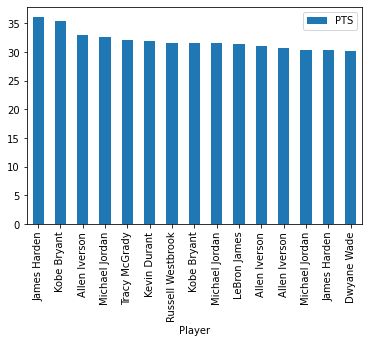

In [117]:
high_score.plot.bar('Player','PTS')

In [120]:
#highest points reached in each year
highest_score= stats.groupby('year').apply(lambda l: l.sort_values('PTS', ascending=False).head(1))

<AxesSubplot:xlabel='year'>

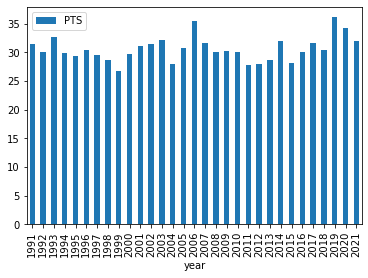

In [121]:
highest_score.plot.bar('year', 'PTS')

In [122]:
stats.corr()['Share']

Age        0.018596
G          0.089282
GS         0.167476
MP         0.162175
FG         0.276365
FGA        0.249254
FG%        0.064901
3P         0.096225
3PA        0.096460
3P%        0.030621
2P         0.275976
2PA        0.251885
2P%        0.061986
eFG%       0.058549
FT         0.316392
FTA        0.321457
FT%        0.040052
ORB        0.101375
DRB        0.213241
TRB        0.186209
AST        0.200253
STL        0.175041
BLK        0.154713
TOV        0.233015
PF         0.071046
PTS        0.288267
year      -0.008135
Pts Won    0.995153
Pts Max    0.521335
Share      1.000000
W          0.122718
L         -0.121866
W/L%       0.126559
GB        -0.101014
PS/G       0.045206
PA/G      -0.039617
SRS        0.122782
Name: Share, dtype: float64

<AxesSubplot:>

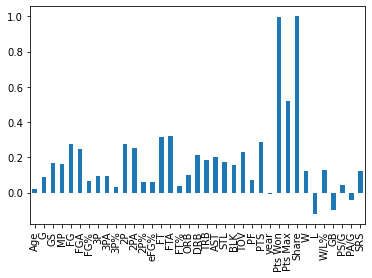

In [125]:
stats.corr()['Share'].plot.bar()

### Applying Machine learning to make predictions

In [3]:
stats = pd.read_csv('player_mvp_team.csv')

In [4]:
stats.head(4)

,Unnamed: 0,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,Pts Max,Share,team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
1,1,Byron Scott,SG,29,LAL,82,82,32.1,6.1,12.8,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
2,2,Elden Campbell,PF,22,LAL,52,0,7.3,1.1,2.4,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
3,3,Irving Thomas,PF,25,LAL,26,0,4.2,0.7,1.9,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73


#### Data cleaning

In [5]:
del stats['Unnamed: 0']

In [7]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14092 entries, 0 to 14091
Data columns (total 41 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Player   14092 non-null  object 
 1   Pos      14092 non-null  object 
 2   Age      14092 non-null  int64  
 3   Tm       14092 non-null  object 
 4   G        14092 non-null  int64  
 5   GS       14092 non-null  int64  
 6   MP       14092 non-null  float64
 7   FG       14092 non-null  float64
 8   FGA      14092 non-null  float64
 9   FG%      14092 non-null  float64
 10  3P       14092 non-null  float64
 11  3PA      14092 non-null  float64
 12  3P%      14092 non-null  float64
 13  2P       14092 non-null  float64
 14  2PA      14092 non-null  float64
 15  2P%      14092 non-null  float64
 16  eFG%     14092 non-null  float64
 17  FT       14092 non-null  float64
 18  FTA      14092 non-null  float64
 19  FT%      14092 non-null  float64
 20  ORB      14092 non-null  float64
 21  DRB      140

#### Defining predictors

In [12]:
stats.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'year',
       'Pts Won', 'Pts Max', 'Share', 'team', 'W', 'L', 'W/L%', 'GB', 'PS/G',
       'PA/G', 'SRS'],
      dtype='object')

In [13]:
#remove all string columns for prediction as well as target (share col)
predictors = ['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'year',
       'W', 'L', 'W/L%', 'GB', 'PS/G',
       'PA/G', 'SRS']

In [19]:
#importing ridge regression model
from sklearn.linear_model import Ridge

#### Defining the model

In [16]:
train = stats[stats['year'] < 2021]
test = stats[stats['year'] == 2021]

In [20]:
rm = Ridge(alpha = .1)
rm.fit(train[predictors],train['Share'])

Ridge(alpha=0.1)

In [22]:
predictions = rm.predict(test[predictors])
predictions = pd.DataFrame(predictions, index= test.index)

In [24]:
predictions

,0
630,0.013567
631,-0.013756
632,0.002414
633,-0.004421
634,0.010734
...,...
13897,-0.012571
13898,-0.011575
13899,0.016424
13900,-0.020434


In [33]:
combo = pd.concat([test[['Player','Share']], predictions], axis = 1)

In [26]:
combo

,Player,Share,0
630,Aaron Gordon,0.0,0.013567
631,Austin Rivers,0.0,-0.013756
632,Bol Bol,0.0,0.002414
633,Facundo Campazzo,0.0,-0.004421
634,Greg Whittington,0.0,0.010734
...,...,...,...
13897,Patty Mills,0.0,-0.012571
13898,Quinndary Weatherspoon,0.0,-0.011575
13899,Rudy Gay,0.0,0.016424
13900,Tre Jones,0.0,-0.020434


In [27]:
combo.sort_values('Share', ascending = False)

,Player,Share,0
641,Nikola Jokić,0.961,0.154307
8624,Joel Embiid,0.580,0.162713
3651,Stephen Curry,0.449,0.142386
9907,Giannis Antetokounmpo,0.345,0.207436
1389,Chris Paul,0.138,0.072294
...,...,...,...
4171,Chris Chiozza,0.000,0.007047
4170,Bruce Brown,0.000,0.003656
4169,Blake Griffin,0.000,0.011746
4168,Andre Roberson,0.000,-0.026907


#### Error evaluation of the model- definig error metric

In [28]:
from sklearn.metrics import mean_squared_error

In [31]:
mean_squared_error(combo['Share'],combo[0])

0.002666895456710404

In [78]:
combo['Share'].value_counts()

0.000    525
0.001      3
0.961      1
0.138      1
0.042      1
0.038      1
0.020      1
0.003      1
0.008      1
0.010      1
0.580      1
0.449      1
0.005      1
0.345      1
Name: Share, dtype: int64

#### Defining actual rank and predicted rank for players

In [36]:
combo = combo.sort_values('Share', ascending=False)
combo['rank'] = list(range(1,combo.shape[0]+1))
combo

,Player,Share,0,rank
641,Nikola Jokić,0.961,0.154307,1
8624,Joel Embiid,0.580,0.162713,2
3651,Stephen Curry,0.449,0.142386,3
9907,Giannis Antetokounmpo,0.345,0.207436,4
1389,Chris Paul,0.138,0.072294,5
...,...,...,...,...
13894,Keldon Johnson,0.000,-0.000175,536
13895,Lonnie Walker IV,0.000,-0.019368,537
13896,Luka Šamanić,0.000,-0.004997,538
13897,Patty Mills,0.000,-0.012571,539


In [40]:
combo = combo.sort_values(0,ascending=False)
combo['pred_rank'] = list(range(1,combo.shape[0]+1))
combo.sort_values('Share', ascending=False).head(10)

,Player,Share,0,rank,pred_rank
641,Nikola Jokić,0.961,0.154307,1,3
8624,Joel Embiid,0.580,0.162713,2,2
3651,Stephen Curry,0.449,0.142386,3,6
9907,Giannis Antetokounmpo,0.345,0.207436,4,1
1389,Chris Paul,0.138,0.072294,5,33
10997,Luka Dončić,0.042,0.151430,6,4
7464,Damian Lillard,0.038,0.116303,7,12
3536,Julius Randle,0.020,0.088878,8,24
3531,Derrick Rose,0.010,0.033000,9,76
11358,Rudy Gobert,0.008,0.095349,10,19


#### Calculating precision error 

In [57]:
def find_ap(combo):
    actual = combo.sort_values('Share', ascending = False).head(5)
    predicted = combo.sort_values('prediction',ascending =False)
    ps = []
    found = 0
    seen = 1
    for index,row in predicted.iterrows():
        if row['Player'] in actual['Player'].values:
            found += 1
            ps.append(found/seen)
        seen += 1
    return sum(ps)/len(ps)

In [42]:
find_ap(combo)

0.7636363636363636

#### Backtesting

In [50]:
years = list(range(1991,2022))

In [54]:
def add_rank(combo):
    combo = combo.sort_values('Share', ascending=False)
    combo['rank'] = list(range(1,combo.shape[0]+1))
    combo = combo.sort_values('prediction',ascending=False)
    combo['pred_rank'] = list(range(1,combo.shape[0]+1))
    combo['diff'] = combo['rank'] - combo['pred_rank']
    return combo

In [65]:
def back_test(stats,model,years,predictors):
    aps = []
    all_preds =[]
    for year in years:
        train = stats[stats['year'] < year]
        test = stats[stats['year'] == year]
        model.fit(train[predictors], train['Share'])
        predictions = model.predict(test[predictors])
        predictions = pd.DataFrame(predictions, columns = ['prediction'], index = test.index)
        combo = pd.concat([test[['Player','Share']],predictions], axis = 1)
        combo = add_rank(combo)
        all_preds.append(combo)
        aps.append(find_ap(combo))
    return sum(aps)/len(aps), aps, pd.concat(all_preds)

In [66]:
mean_ap, aps, all_pred = back_test(stats,rm,years[5:],predictors)

In [67]:
mean_ap

0.7112884360789578

#### Top biggest differences- Diagnosing regression model

In [74]:
all_pred[all_pred['rank'] < 6].sort_values('diff').head(10)

,Player,Share,prediction,rank,pred_rank,diff
1224,Jason Kidd,0.712,0.028209,2,52,-50
8248,Glen Rice,0.117,0.033110,5,53,-48
5175,Steve Nash,0.839,0.034100,1,45,-44
8516,Peja Stojaković,0.228,0.036269,4,38,-34
5193,Steve Nash,0.739,0.054128,1,34,-33
12726,Joakim Noah,0.258,0.046968,4,37,-33
3657,Chauncey Billups,0.344,0.052698,5,35,-30
1389,Chris Paul,0.138,0.072294,5,33,-28
5208,Steve Nash,0.785,0.074421,2,21,-19
4682,Tim Hardaway,0.207,0.059984,4,20,-16


In [75]:
#coefficient of regression
print(rm.coef_)

[ 3.21225799e-04  9.16295119e-05 -5.62287893e-06 -4.14969303e-03
  5.69435368e-03  5.51627207e-03 -1.35025345e-01  4.56936500e-03
 -1.03942800e-02 -9.82179223e-03  1.69452132e-02 -1.73181709e-02
  4.08318282e-03  7.00021750e-02 -6.58501469e-03  1.13509610e-02
 -4.57492793e-03  2.16104448e-02  3.50411278e-02 -2.75059354e-02
  7.45553644e-03  1.16354220e-02  1.12337946e-02 -9.69644454e-03
 -2.63402385e-03  5.89333750e-03 -1.84247808e-04  9.78858335e-05
 -2.95483880e-04  2.71257474e-02  2.69641841e-04 -5.56160227e-04
 -2.18797486e-04 -5.21394525e-04]


In [77]:
#find th emost important predictors in regression model
pd.concat([pd.Series(rm.coef_),pd.Series(predictors)], axis = 1).sort_values(0, ascending =False)

,0,1
13,0.070002,eFG%
18,0.035041,DRB
29,0.027126,W/L%
17,0.021610,ORB
10,0.016945,2P
21,0.011635,STL
15,0.011351,FTA
22,0.011234,BLK
20,0.007456,AST
25,0.005893,PTS


### Adding more predictors

In [82]:
stat_ratio = stats[["PTS", "AST", "STL", "BLK", "3P", "year"]].groupby('year').apply(lambda l: l/l.mean())

In [83]:
stats[['PTS-r','AST-r','STL-r','BLK-r','3P-r']] = stat_ratio[["PTS", "AST", "STL", "BLK", "3P"]]

In [84]:
predictors += ['PTS-r','AST-r','STL-r','BLK-r','3P-r']

#### Test the model with new predictors

In [85]:
mean_ap, aps, all_pred = back_test(stats,rm,years[5:],predictors)

In [86]:
mean_ap

0.7208380973034985

In [89]:
stats['Npos'] = stats['Pos'].astype('category').cat.codes
stats.head(4)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,GB,PS/G,PA/G,SRS,PTS-r,AST-r,STL-r,BLK-r,3P-r,Npos
0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,0.476,...,5.0,106.3,99.6,6.73,1.013334,0.420714,0.961127,0.673469,0.508587,2
1,Byron Scott,SG,29,LAL,82,82,32.1,6.1,12.8,0.477,...,5.0,106.3,99.6,6.73,1.614653,1.028412,1.647646,0.673469,4.577279,12
2,Elden Campbell,PF,22,LAL,52,0,7.3,1.1,2.4,0.455,...,5.0,106.3,99.6,6.73,0.311795,0.093492,0.274608,1.571429,0.000000,2
3,Irving Thomas,PF,25,LAL,26,0,4.2,0.7,1.9,0.340,...,5.0,106.3,99.6,6.73,0.200440,0.186984,0.274608,0.000000,0.000000,2


In [91]:
stats['Nteam'] = stats['Tm'].astype('category').cat.codes

In [98]:
stats['Nteameam'].value_counts()

7     499
27    495
8     493
14    493
11    492
17    491
12    490
0     485
9     480
31    479
1     479
26    476
15    475
18    475
13    474
5     473
24    468
19    466
30    465
34    464
28    463
29    463
10    461
33    421
36    387
20    343
16    331
32    263
25    214
4     177
2     165
3     157
23    145
21    143
37    114
6     113
35     88
22     32
Name: Nteam, dtype: int64

In [92]:
predictors += ['Nteam','Npos']

In [93]:
mean_ap, aps, all_pred = back_test(stats,rm,years[5:],predictors)

In [94]:
mean_ap

0.7184008100935044

### Using RandomForest Predictor

In [97]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200, random_state=1,min_samples_split=5)
mean_ap, aps, all_pred = back_test(stats,rf,years[5:],predictors)

In [99]:
mean_ap

0.7217269415850924

### Scaling Predictors

In [100]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [101]:
def back_test(stats,model,years,predictors):
    aps = []
    all_preds =[]
    for year in years:
        train = stats[stats['year'] < year]
        test = stats[stats['year'] == year]
        sc.fit(train[predictors])
        train[predictors] = sc.transform(train[predictors])
        test[predictors] = sc.transform(test[predictors])
        model.fit(train[predictors], train['Share'])
        predictions = model.predict(test[predictors])
        predictions = pd.DataFrame(predictions, columns = ['prediction'], index = test.index)
        combo = pd.concat([test[['Player','Share']],predictions], axis = 1)
        combo = add_rank(combo)
        all_preds.append(combo)
        aps.append(find_ap(combo))
    return sum(aps)/len(aps), aps, pd.concat(all_preds)

In [102]:
years[18]

2009

In [103]:
mean_ap, aps, all_pred = back_test(stats,rf,years[18:],predictors)

<ipython-input-101-f2cba4b76f89>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[predictors] = sc.transform(train[predictors])
C:\Users\Arsene\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
<ipython-input-101-f2cba4b76f89>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

<ipython-input-101-f2cba4b76f89>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[predictors] = sc.transform(train[predictors])
C:\Users\Arsene\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
<ipython-input-101-f2cba4b76f89>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

<ipython-input-101-f2cba4b76f89>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[predictors] = sc.transform(train[predictors])
C:\Users\Arsene\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
<ipython-input-101-f2cba4b76f89>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [104]:
mean_ap

0.7653269823968205

In [105]:
mean_ap, aps, all_pred = back_test(stats,rm,years[18:],predictors)

<ipython-input-101-f2cba4b76f89>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[predictors] = sc.transform(train[predictors])
C:\Users\Arsene\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
<ipython-input-101-f2cba4b76f89>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

<ipython-input-101-f2cba4b76f89>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[predictors] = sc.transform(train[predictors])
C:\Users\Arsene\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
<ipython-input-101-f2cba4b76f89>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

<ipython-input-101-f2cba4b76f89>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[predictors] = sc.transform(train[predictors])
C:\Users\Arsene\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
<ipython-input-101-f2cba4b76f89>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [106]:
mean_ap

0.776228193136371